In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(
    "./Dossier/Labs/Data/ine_principais_culturas_agricolas.csv",
    delimiter=";",
    encoding="latin-1",
    header=[6],
    nrows=8,
)

FileNotFoundError: [Errno 2] No such file or directory: 'ine_principais_culturas_agricolas.csv'

In [ ]:
data

In [ ]:
data.drop(labels=[0], inplace=True)

# saber se temos NaN

# a = data.isna().sum()
# a[a>0]

data

In [ ]:
c = data.columns.values
c[0] = "Region"
data.columns = c

# outra forma

# data.rename({'Unnamed: 0': 'Region'}, axis = 1,  inplace = True)

data

In [ ]:
data.set_index("Region")

In [ ]:
data["Code"] = data["Region"].transform(lambda t: t.split(":")[0])

data

# outra forma

# data['Region'].apply(lambda t: t.split(':')[0])

# data

# outra forma

# data['Code'], data['Region'] = data['Region'].strsplit(':')

In [ ]:
data.set_index("Code", inplace=True)
data

In [ ]:
data.drop(columns=["Unnamed: 3421"], inplace=True)
data

In [ ]:
data.describe()

In [ ]:
data.loc["PT"]

In [ ]:
data.mask(data.values == "- -", other=0, inplace=True)

In [ ]:
data.mask(data.values == "x x", other="Nan", inplace=True)

In [ ]:
data2 = data.convert_dtypes(convert_integer=True)

In [ ]:
data.describe()

In [ ]:
import numpy as np

data["Trigo"].astype(np.int16)

# Using MultiIndex

In [ ]:
data = pd.read_csv(
    "ine_principais_culturas_agricolas.csv",
    delimiter=";",
    encoding="latin-1",
    header=[4, 6],
    nrows=8,
)

# on_bad_lines = 'skip'
# skiprows = [7]

data

In [ ]:
data.index

In [ ]:
data.drop(labels=[0], inplace=True)

data.drop(columns=data.columns[-1], inplace=True)

data.head(2)

In [ ]:
# clean up column names by filling in missing ones
c0 = data.columns.get_level_values(0).to_series()
c0

c1 = data.columns.get_level_values(1).to_series()
c1

c0 = c0.mask(lambda c: c.str.startswith("Unnamed")).ffill()
c0

# novos nomes das colunas
data.columns = [c0, c1]
data

data.index

In [ ]:
data.rename({"Unnamed: 0_level_1": "Region"}, axis=1, inplace=True)

In [ ]:
data

In [ ]:
data.set_index(data.columns[0], inplace=True)

In [ ]:
region_code = data.index.to_series().apply(lambda t: t.split(":")[0])
data.set_index(region_code, inplace=True)
data.index.rename = "Region"
data.index.name = "Region"
data

In [ ]:
data.columns = data.columns.rename("products", level=1)
data.columns = data.columns.rename("years", level=0)
data

# IPMA DATA

In [8]:
ipma_data = pd.read_excel(
    "/Users/joaoantonio/Documents/Course/Data Scientist Fundamentals/Dossier/Labs/Data/IPMA/11-tx-tn-prec.xlsx",
    3,
)
ipma_data

,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2016,386.2,251.1,168.8,241.5,220.8,27.9,4.6,1.7,31.2,97.5,157.7,53.5
154,2017,84.8,348.6,90.7,34.9,194.4,25.8,13.2,52.5,2.3,36.9,76.8,198.2
155,2018,136.9,51.2,524.5,181.6,36.3,71.2,56.8,0.6,66.0,87.5,340.7,224.0
156,2019,70.9,61.1,100.7,210.6,35.0,83.4,13.5,46.3,48.4,162.8,277.9,377.5


In [9]:
ipma_data.set_index("year", inplace=True)
ipma_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,386.2,251.1,168.8,241.5,220.8,27.9,4.6,1.7,31.2,97.5,157.7,53.5
2017,84.8,348.6,90.7,34.9,194.4,25.8,13.2,52.5,2.3,36.9,76.8,198.2
2018,136.9,51.2,524.5,181.6,36.3,71.2,56.8,0.6,66.0,87.5,340.7,224.0


In [10]:
ipma_data = ipma_data.loc["1986":"2022"]
ipma_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1986,145.30,351.00,43.400,106.300,34.8,53.1,0.0,21.3,235.3,59.1,135.0,84.5
1987,134.90,140.90,88.400,171.800,10.2,34.1,27.9,13.3,131.5,478.1,58.2,299.6
1988,368.50,146.80,4.300,137.600,162.1,154.4,38.4,0.0,8.9,191.1,75.1,30.2
1989,33.60,118.80,78.300,116.600,81.8,59.6,2.3,44.0,0.4,114.2,285.1,652.1
1990,186.00,129.80,48.600,70.600,37.5,16.8,5.8,36.7,20.2,253.7,72.5,71.9
1991,261.90,175.80,262.100,42.400,38.9,11.1,51.9,16.0,99.4,99.8,227.5,37.6
1992,61.60,43.80,81.800,81.900,127.9,62.3,4.0,67.4,36.3,101.5,39.9,237.6
1993,78.70,13.70,32.000,150.200,201.9,66.2,21.9,7.5,149.1,466.5,171.8,35.3
1994,218.30,242.40,28.100,82.200,239.5,6.6,22.4,24.0,33.6,129.0,254.6,177.6


In [11]:
ipma_mean = ipma_data.mean(axis=1)

In [12]:
ipma_mean

year
1986    105.758333
1987    132.408333
1988    109.783333
1989    132.233333
1990     79.175000
1991    110.366667
1992     78.833333
1993    116.233333
1994    121.525000
1995    160.150000
1996    141.925000
1997     94.541667
1998     89.675000
1999    136.016667
2000    138.483333
2001    171.300000
2002    124.241667
2003    125.541667
2004    110.500000
2005     77.150000
2006    159.541667
2007     75.875000
2008    105.391667
2009    164.075000
2010    190.933333
2011     92.475000
2012     86.525000
2013    126.675000
2014    131.955000
2015     91.975000
2016    136.875000
2017     96.591667
2018    148.108333
2019    124.008333
2020           NaN
dtype: float64

In [25]:
def importipma(file_name):
    for k in [1, 2, 3]:
        ipma_data = pd.read_excel(file_name, sheet_name=k)
        ipma_data.set_index(ipma_data.columns[0], inplace=True)
        ipma_data = ipma_data.loc["1986":"2022"]
        ipma_data = ipma_data.mean(axis=1)
        ipma_data_final = (
            ipma_data if k == 1 else pd.concat([ipma_data_final, ipma_data], axis=1)
        )
    return ipma_data_final

In [28]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [ ]:
def importipma(file_name, sheet_name):
    ipma_data = pd.read_excel(file_name, sheet_name=sheet_name)
    ipma_data.set_index(ipma_data.columns[0], inplace=True)
    ipma_data = ipma_data.loc["1986":"2022"]
    return ipma_data.mean(axis=1)
    return ipma_data

In [26]:
a = importipma(
    "/Users/joaoantonio/Documents/Course/Data Scientist Fundamentals/Dossier/Labs/Data/IPMA/11-tx-tn-prec.xlsx"
)

In [27]:
a.head()

,0,1,0
year,,,
1986,5.125000,13.958333,105.758333
1987,6.300000,14.991667,132.408333
1988,5.875000,14.208333,109.783333
1989,7.016667,15.800000,132.233333
1990,6.583333,15.366667,79.175000


In [ ]:
a.tail()

year
2016    136.875000
2017     96.591667
2018    148.108333
2019    124.008333
2020           NaN
dtype: float64

In [ ]:
a

year
1986    105.758333
1987    132.408333
1988    109.783333
1989    132.233333
1990     79.175000
1991    110.366667
1992     78.833333
1993    116.233333
1994    121.525000
1995    160.150000
1996    141.925000
1997     94.541667
1998     89.675000
1999    136.016667
2000    138.483333
2001    171.300000
2002    124.241667
2003    125.541667
2004    110.500000
2005     77.150000
2006    159.541667
2007     75.875000
2008    105.391667
2009    164.075000
2010    190.933333
2011     92.475000
2012     86.525000
2013    126.675000
2014    131.955000
2015     91.975000
2016    136.875000
2017     96.591667
2018    148.108333
2019    124.008333
2020           NaN
dtype: float64

<AxesSubplot: xlabel='year'>

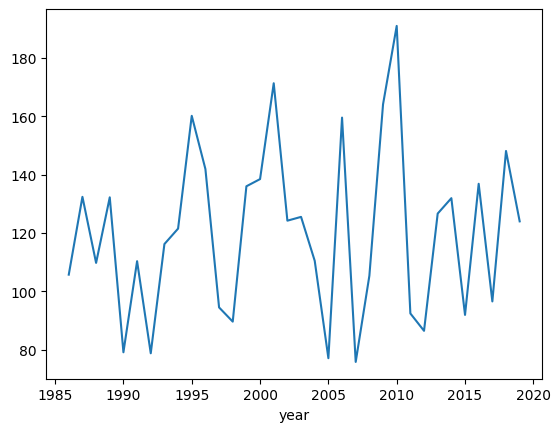

In [ ]:
a.plot()